In [2]:
import pandas as pd

In [3]:
train_df = pd.read_csv("./Completedataset_Train.csv")
valid_df = pd.read_csv("./Completedataset_Test.csv")

In [4]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,35,4,5,7,8,9,10,10,10,2,...,9,9,10,10,11,11,8,8,10,11
1,1,11,13,17,20,21,20,18,17,20,...,40,25,16,20,11,15,14,15,16,18
2,30,17,8,4,11,20,20,12,6,15,...,13,13,14,13,13,13,11,12,15,17
3,18,11,13,15,15,13,12,12,13,20,...,10,9,7,6,5,4,7,5,6,11
4,1,10,12,16,19,20,19,17,16,13,...,12,17,19,16,15,17,15,16,17,18


In [5]:
train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
33595,5,13,19,28,33,34,32,29,28,35,...,46,56,27,28,25,32,22,23,24,25
33596,16,16,16,15,17,18,18,17,15,20,...,14,13,13,13,14,14,15,15,16,16
33597,4,6,24,19,7,17,19,11,15,18,...,28,8,14,21,14,17,13,13,15,16
33598,7,5,8,12,15,17,17,16,14,10,...,35,29,15,11,13,13,12,12,14,15
33599,18,12,12,13,13,13,12,11,11,23,...,8,6,9,11,8,2,7,2,3,7


In [6]:
n_samples = len(train_df)
print("Total samples:", n_samples)

Total samples: 33600


In [7]:
y_train=train_df['label']
y_valid=valid_df['label']
del train_df['label']
del valid_df['label']

In [8]:
x_train=train_df.values
x_valid=valid_df.values

In [9]:
x_train.shape

(33600, 784)

In [10]:
y_train.shape

(33600,)

In [11]:
x_valid.shape

(8400, 784)

In [12]:
y_valid.shape

(8400,)

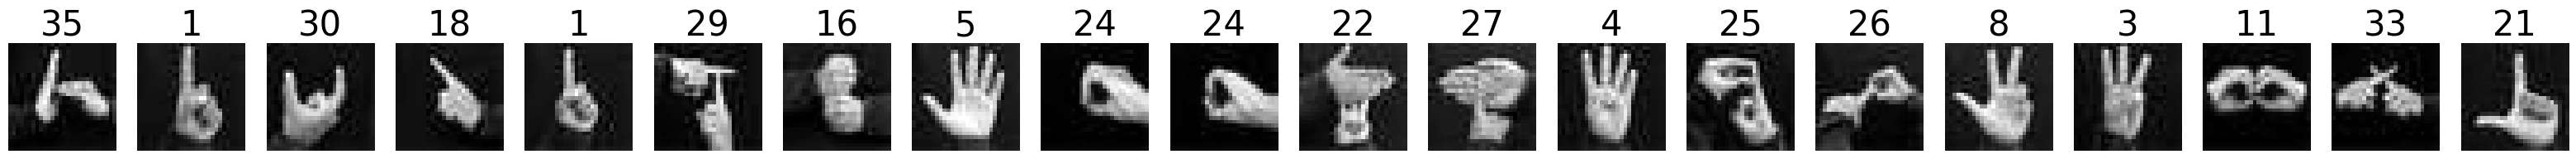

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))

num_images=20
for i in range(num_images):
    row=x_train[i]
    label=y_train[i]
    
    image=row.reshape(28, 28)
    plt.subplot(1,num_images,i+1)
    plt.title(label, fontdict={'fontsize':30})
    plt.axis('off')
    plt.imshow(image,cmap='gray')

In [14]:
x_train.min()

0

In [15]:
x_train.max()

235

In [16]:
x_train=x_train/255
x_valid=x_valid/255

In [20]:
x_train[0][0:5]

array([0.01568627, 0.01960784, 0.02745098, 0.03137255, 0.03529412])

In [21]:
x_train[1][0:5]

array([0.04313725, 0.05098039, 0.06666667, 0.07843137, 0.08235294])

In [22]:
x_valid[0][0:5]

array([0.01568627, 0.01960784, 0.02745098, 0.03137255, 0.03529412])

In [23]:
x_valid[1][0:5]

array([0.04705882, 0.05490196, 0.0627451 , 0.0627451 , 0.05490196])

In [33]:
y_train[0:5]


0    35
1     1
2    30
3    18
4     1
Name: label, dtype: int64

In [34]:
y_valid[0:5]

0    35
1    18
2    13
3    34
4    27
Name: label, dtype: int64

In [35]:
import tensorflow as tf
import keras as keras
num_categories = 36

In [36]:
y_train=keras.utils.to_categorical(y_train,num_categories)
y_valid=keras.utils.to_categorical(y_valid,num_categories)

In [37]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

In [38]:
from keras.layers import Dense, Flatten


In [39]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[28, 28, 1]))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))  
model.add(tf.keras.layers.Dense(units=num_categories, activation='softmax'))

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [41]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
x_train_reshaped = x_train.reshape(-1, 28, 28, 1)
x_valid_reshaped = x_valid.reshape(-1, 28, 28, 1)
history = model.fit(x_train_reshaped, y_train, epochs=20, validation_data=(x_valid_reshaped, y_valid))

Epoch 1/20
1050/1050 [==============================] - 44s 39ms/step - loss: 0.2775 - accuracy: 0.9225 - val_loss: 1.0183e-04 - val_accuracy: 1.0000
Epoch 2/20
1050/1050 [==============================] - 80s 77ms/step - loss: 0.0194 - accuracy: 0.9935 - val_loss: 5.3291e-05 - val_accuracy: 1.0000
Epoch 3/20
1050/1050 [==============================] - 86s 82ms/step - loss: 0.0134 - accuracy: 0.9954 - val_loss: 5.4153e-06 - val_accuracy: 1.0000
Epoch 4/20
1050/1050 [==============================] - 79s 75ms/step - loss: 0.0101 - accuracy: 0.9966 - val_loss: 5.7221e-07 - val_accuracy: 1.0000
Epoch 5/20
1050/1050 [==============================] - 57s 55ms/step - loss: 0.0086 - accuracy: 0.9974 - val_loss: 1.4732e-07 - val_accuracy: 1.0000
Epoch 6/20
1050/1050 [==============================] - 50s 48ms/step - loss: 0.0075 - accuracy: 0.9972 - val_loss: 3.1181e-05 - val_accuracy: 1.0000
Epoch 7/20
1050/1050 [==============================] - 56s 53ms/step - loss: 0.0065 - accuracy: 0.9

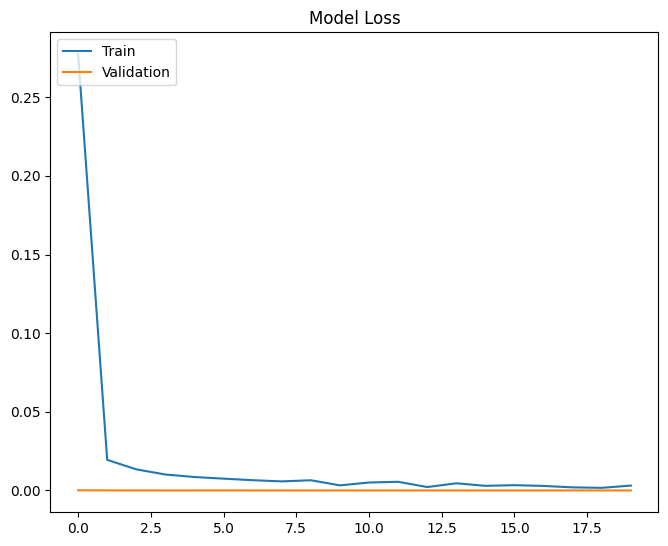

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

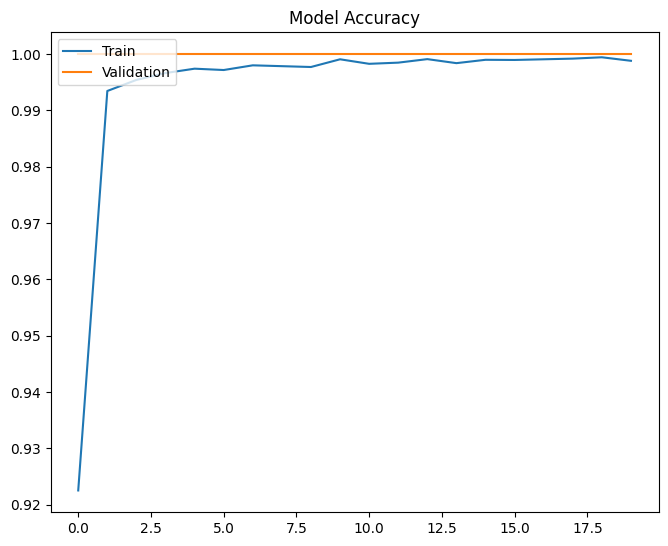

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

In [45]:
from keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(horizontal_flip=True,vertical_flip=False,)

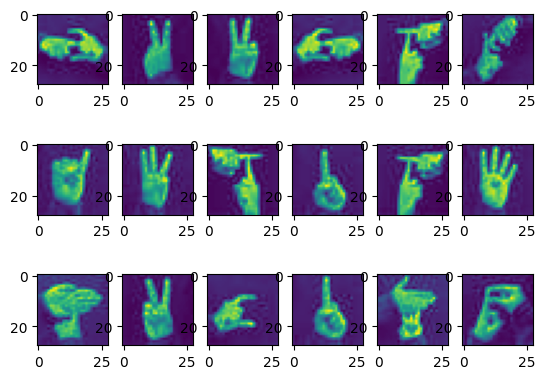

In [46]:
import matplotlib.pyplot as plt
import numpy as np
batch_size=18

x_train_reshaped = x_train.reshape(-1, 28, 28, 1)
x_valid_reshaped = x_valid.reshape(-1, 28, 28, 1)

img_iter=datagen.flow(x_train_reshaped,y_train,batch_size=batch_size)

x,y=img_iter.next()
fig, ax=plt.subplots(nrows=3,ncols=6)
for i in range(batch_size):
    image=x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

In [47]:
datagen.fit(x_train_reshaped)

In [48]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

In [49]:
model.fit(img_iter,epochs=20,steps_per_epoch=len(x_train_reshaped)//batch_size,validation_data=(x_valid_reshaped,y_valid))


Epoch 1/20
1866/1866 [==============================] - 48s 23ms/step - loss: 0.1823 - accuracy: 0.9632 - val_loss: 7.9483e-07 - val_accuracy: 1.0000
Epoch 2/20
1866/1866 [==============================] - 43s 23ms/step - loss: 0.0103 - accuracy: 0.9969 - val_loss: 2.7162e-08 - val_accuracy: 1.0000
Epoch 3/20
1866/1866 [==============================] - 43s 23ms/step - loss: 0.0067 - accuracy: 0.9978 - val_loss: 4.5129e-09 - val_accuracy: 1.0000
Epoch 4/20
1866/1866 [==============================] - 43s 23ms/step - loss: 0.0044 - accuracy: 0.9986 - val_loss: 8.5149e-11 - val_accuracy: 1.0000
Epoch 5/20
1866/1866 [==============================] - 44s 23ms/step - loss: 0.0033 - accuracy: 0.9990 - val_loss: 8.5149e-11 - val_accuracy: 1.0000
Epoch 6/20
1866/1866 [==============================] - 43s 23ms/step - loss: 0.0032 - accuracy: 0.9990 - val_loss: 2.4126e-10 - val_accuracy: 1.0000
Epoch 7/20
1866/1866 [==============================] - 43s 23ms/step - loss: 0.0033 - accuracy: 0.9

In [50]:
model.save('model.h5')

In [51]:
model = keras.models.load_model('model.h5')

In [52]:

model = keras.models.load_model('model.h5')

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [54]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    image=mpimg.imread(image_path)
    plt.imshow(image,cmap='gray')

In [55]:
import image_utils
from keras.utils import load_img, img_to_array



In [56]:
import cv2

def load_and_scale_image(image_path):
    image = image_utils.load_img(image_path, color_mode="grayscale", target_size=(28, 28))
    image_array = image_utils.img_to_array(image)
    image_array = image_array.astype('uint8')
    blurred_image = cv2.GaussianBlur(image_array, (5, 5), 0)
    _, thresholded_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    return thresholded_image

In [57]:
alphabet = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"
dictionary = {}
for i in range(36):
    dictionary[i] = alphabet[i]
dictionary

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z'}

In [58]:
from tensorflow.keras.preprocessing import image as image_utils

def predict_letter(file_path):
    show_image(file_path)
    image = load_and_scale_image(file_path)
    image = image_utils.img_to_array(image)
    image = image.reshape(1,28,28,1)
    image = image / 255
    prediction = model.predict(image)
    predicted_letter = dictionary[np.argmax(prediction)]
    return predicted_letter   


1/1 [==============================] - 0s 203ms/step


'W'

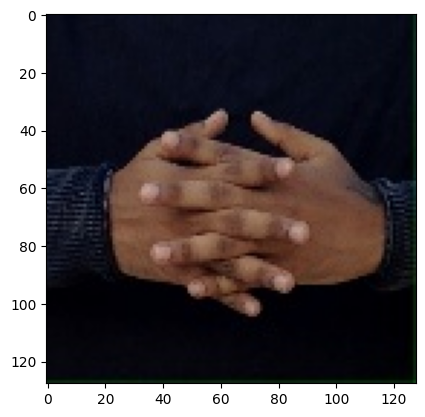

In [59]:
predict_letter("./data/W/1.jpg")

1/1 [==============================] - 0s 37ms/step


'3'

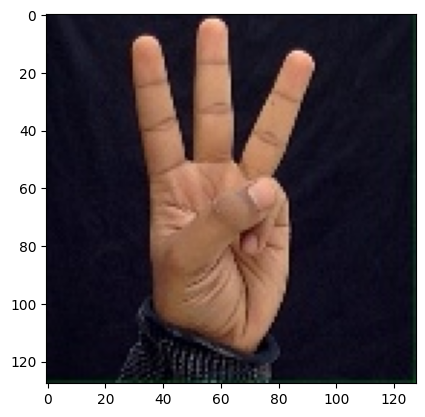

In [60]:
predict_letter("./data/3/14.jpg")

1/1 [==============================] - 0s 37ms/step


'E'

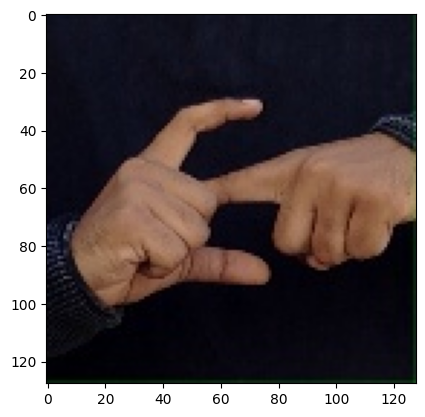

In [61]:
predict_letter("./data/E/10.jpg")

1/1 [==============================] - 0s 39ms/step


'9'

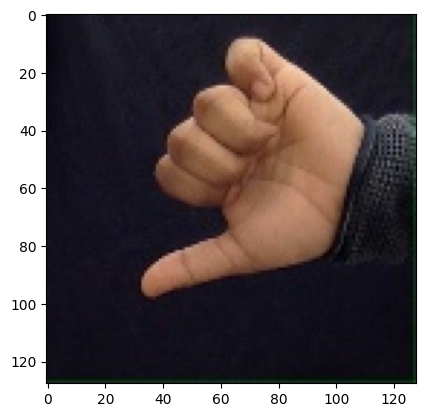

In [62]:
predict_letter("./data/9/21.jpg")